# Presentation sound

## Imports and Constants

In [206]:
import pyroomacoustics as pra
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
from scipy.fftpack import fft
import IPython
import math

# specify signal source
FS, SIGNAL = wavfile.read("..\\data\\original\\arctic_a0100.wav")

## Generate sound

In [207]:
room = pra.ShoeBox([10, 10, 10], fs=FS, max_order=0)

room.add_source([9.5, 9.5, 9.5], signal=SIGNAL, delay=0.0)

mic_pos = np.c_[[5/2+0.1, 5/2, 5/2],[5/2-0.1, 5/2, 5/2]]
room.add_microphone_array(mic_pos)

room.simulate()

## Check result

In [208]:
# original signal
print("Original WAV:")
IPython.display.Audio(SIGNAL, rate=FS)

Original WAV:


In [209]:
print("Simulated propagation to first mic:")
IPython.display.Audio(room.mic_array.signals[0,:], rate=FS)

Simulated propagation to first mic:


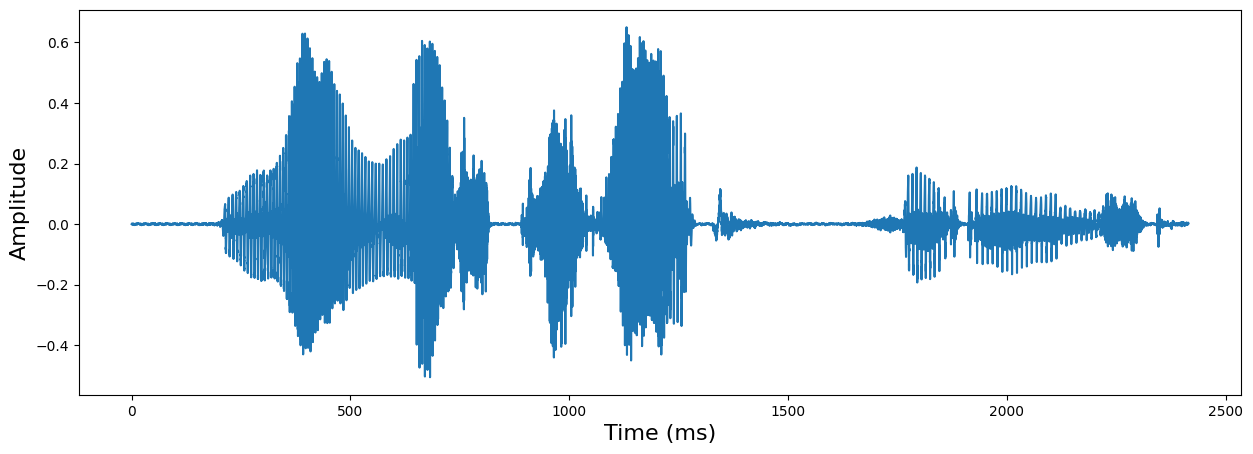

In [210]:
sound = SIGNAL / (2.**15)

# Select first channel
# Create an array of sample point in one dimension
time_array = np.arange(0, float(sound.shape[0]), 1)
time_array = (time_array / FS) * 1000 # scale to milliSeconds

# Plot the tone
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(time_array, sound)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.show()

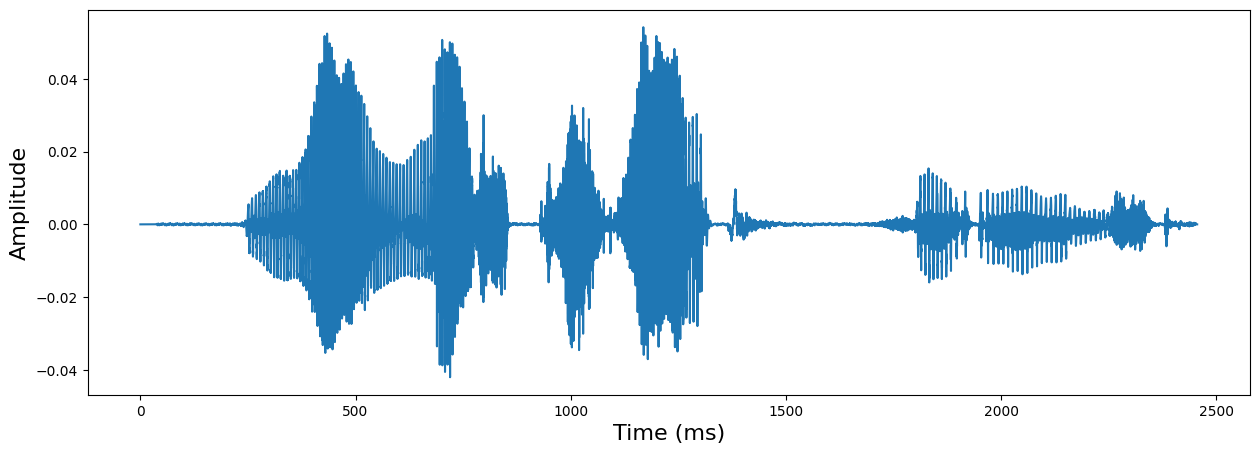

In [211]:
sound = room.mic_array.signals[0,:] / (2.**15)

# Select first channel

# Create an array of sample point in one dimension
time_array = np.arange(0, float(sound.shape[0]), 1)
time_array = (time_array / FS) * 1000 # scale to milliSeconds

# Plot the tone
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(time_array, sound)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.show()

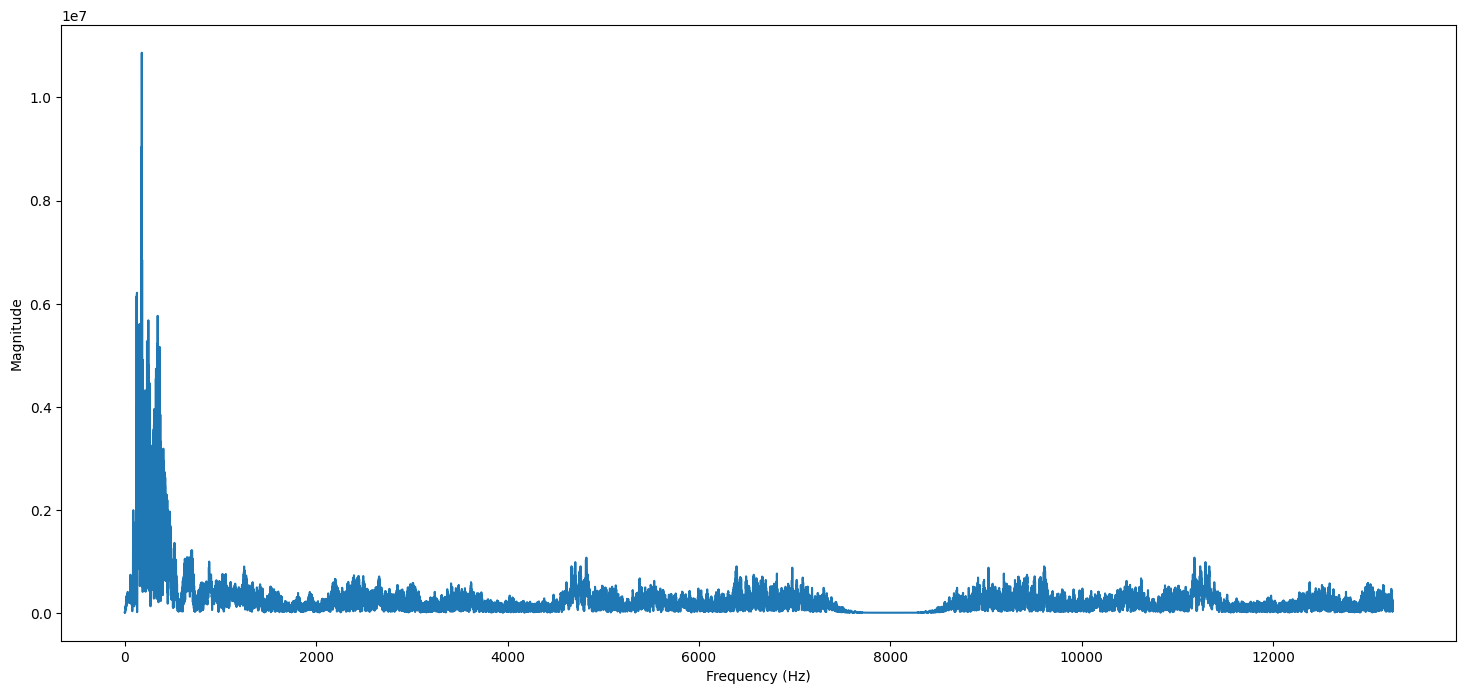

In [212]:
ft = fft(SIGNAL)
magnitude = np.abs(ft)
frequency = np.linspace(0, FS, len(magnitude))

plt.figure(figsize=(18,8))
plt.plot(frequency[:32000], magnitude[:32000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

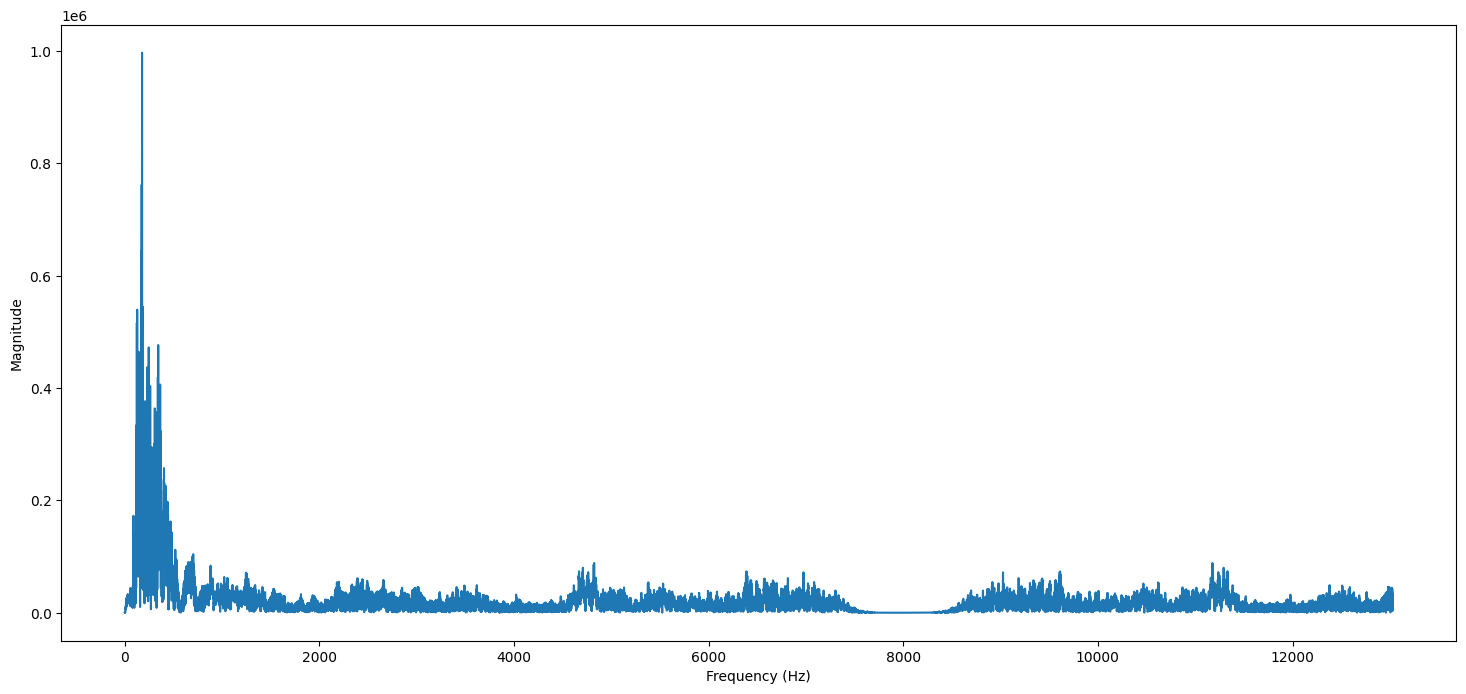

In [213]:
ft = fft(room.mic_array.signals[0,:])
magnitude = np.abs(ft)
frequency = np.linspace(0, FS, len(magnitude))

plt.figure(figsize=(18,8))
plt.plot(frequency[:32000], magnitude[:32000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()